# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Jonathan Mejia

I have used the following AI tools: ChatGPT, Google Gemini

I understand that my submission needs to be my own work: JM

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [1]:
 from google.colab import drive
 import os

 drive.mount('/content/drive')
 os.chdir('/content/drive/My Drive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [24]:
 !jupyter nbconvert --to html robot_vacuum.ipynb

[NbConvertApp] Converting notebook robot_vacuum.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 436189 bytes to robot_vacuum.html


You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [3]:
# make sure numpy is installed
!pip install -q numpy

In [4]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [5]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [6]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [7]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: east
step 2 - action: south
step 3 - action: west
step 4 - action: south
step 5 - action: west
step 6 - action: south
step 7 - action: east
step 8 - action: west
step 9 - action: north
step 10 - action: south
step 11 - action: suck
step 12 - action: north
step 13 - action: east
step 14 - action: south
step 15 - action: suck
step 16 - action: west
step 17 - action: south
step 18 - action: suck
step 19 - action: suck


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [8]:
import numpy as np
import collections


def environment(agent_function, room_size, verbose = True):
## Initialising the invironment by storing state of each square at random to be clean or dirty
  rng = np.random.default_rng()
  environment = rng.choice(["Dirty","Clean"],size = (room_size,room_size))
# The next line can be uncommented to see the environments states for each tile before cleaning
# print(environment)

## Initialize a random position on the floor for the agent to then keep track of
  agent_position = (np.random.randint(0,room_size), np.random.randint(0,room_size))

## Initializing direction based coordinates to be implemented when moving

  directions = {
        "north": (-1,0),
        "south": (1,0),
        "east": (0,1),
        "west": (0,-1)
   }
## Initializing bumpers to keep track of walls in this case will be out of bounds of an array
  bumpers = {}
## Initializing to keep track of the number of dirty spots to be cleaned
  num_cleaned = 0
## Keeping track of the number of Dirty spots are on the floor
  counter= np.count_nonzero(environment == "Dirty")
## Initializing the first Step
  step = 0

## Creating a loop to have the robot continue to clean until all dirty spots are cleaned
  while 0 < counter:
## Need to keep track of the bumpers by doing so looping through each direction to check if there are walls sensed
## from the agents position. If a wall is sensed in this case an IndexError will populate and set the bumper direction
## to True
   for dir, (x,y) in directions.items():
     try:
       pos = agent_position[0] + x, agent_position[1] + y
       if pos[0] < 0 or pos[1]<0 or pos[0]>=environment.shape[0] or pos[1]>=environment.shape[1]:
         raise IndexError
       else:
         bumpers[dir] = False
     except IndexError:
        bumpers[dir] = True
## Need to check current agents positions state whether clean or dirty
   dirty = environment[agent_position]

## Call the agents function by providing the sensors inputs and whether the current position is clean or dirty
## to gather an action for next steps to do when navigating the floor

   action = agent_function(bumpers, dirty)

## Check actions gathered from the agents function to then update the agents new position
   if action == "NA": break
   if action == "north" and bumpers[action] != True: agent_position = agent_position[0] - 1 , agent_position[1]
   if action == "south" and bumpers[action] != True: agent_position = agent_position[0] + 1 , agent_position[1]
   if action == "east" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] + 1
   if action == "west" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] - 1

## Need to make sure if the action is set to suck that the environments state is updated to Clean
   if (action == "suck"):
      environment[agent_position] = 'Clean'
## Iterating the steps
   step = step + 1
## Checking dirty tiles and updating new counter
   counter = np.count_nonzero(environment == "Dirty")
#   The next line can be uncommented to see step by step the agents position
#   if (verbose): print("step", step , "- action:", action," Agent Position: ", agent_position)

# The next line can be uncommented to see the environments states for each tile after cleaning
#  print(environment)

## returning the steps taken to completely clean all dirty squares
  return step


Show that your environment works with the simple randomized agent from above.

In [9]:
# The following will print out the steps taken including the action along with the agents current position
# Finally printing how many steps were taken to clean the entire room

print(f"Took the agent {environment(simple_randomized_agent,2)} steps to clean the room")


Took the agent 9 steps to clean the room


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [10]:
# The following simple reflex agent function will take in sensor paramenters for the bumpers and current
# position state, only storing directions that are not bumping into a wall to then be randomly selected
# for an action to be returned

def simple_reflex_agent(bumpers, dirty):

# Initialize a randomizer
    rng = np.random.default_rng()

# Used to store available random directions that are not bumping into the wall
    random_dir_available = []

# Also directly checks if the current state is dirty and if so returns actions suck
    if dirty == "Dirty":
      return 'suck'

# store available random directions that are not bumping into the wall
    for i in bumpers:
      if bumpers[i] == False: random_dir_available.append(i)

# randomly selects an available direction thats not hitting the walls
    return rng.choice(random_dir_available)

Show how the agent works with your environment.

In [11]:
# This will print the actions taken in a 2x2 floor plan with randomized clean and dirty tiles
# and finish by printing the result by calling the function

print(f"Took the simple reflex agent {environment(simple_reflex_agent,2)} steps to clean the room")



Took the simple reflex agent 10 steps to clean the room


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [12]:
# For the following Agent I will create a class for an agent being initialized to find out
# its current position and keep track by having the position updated per move. To do so
# the agent will first need to find the north west most position to start in a corner. This
# will help the agent keep track of its position. Going forward the agent will move around
# the East Wall, South Wall and then West wall getting to the North West most point and then
# snaking its position to check each square state and updating accordingly to return an action.
# If not return a default value if all directions have been visited.

class Agent:
  def __init__(self):
    self.position = (0,0)
    self.visited = []
    self.start_cleaning = False

  def act(self, bumpers, dirty):
# The following is done to check if the agents position has hit the North east most wall
    while self.start_cleaning == False:
      if bumpers['north'] != True: return 'north'
      if bumpers['west'] != True: return 'west'
      self.start_cleaning = True
# If current agents state is dirty return action suck
    if dirty == 'Dirty': return 'suck'

# and add the position to visited states to keep track of where the agent has been
    self.visited.append(self.position)

# now iterate for each occurance through each direction ensuring a wall is not hit and the
# position has not been visited.
    while bumpers['south']!= True and (self.position[0] + 1, self.position[1]) not in self.visited:
      self.position = self.position[0] + 1, self.position[1]
      return 'south'
    while bumpers['east']!= True and (self.position[0], self.position[1]+1) not in self.visited:
      self.position = self.position[0] , self.position[1] + 1
      return 'east'
    while bumpers['north']!= True and (self.position[0]-1, self.position[1]) not in self.visited:
      self.position = self.position[0]-1 , self.position[1]
      return 'north'
    while bumpers['west']!= True and (self.position[0], self.position[1]-1) not in self.visited:
      self.position = self.position[0] , self.position[1] - 1
      return 'west'
# return a default value if all directions from the current position has been visited
    return "NA"



In [13]:
# Initialize an agent to act on the agents state given code above
agent = Agent()

def model_based_agent(bumpers, dirty):
  return agent.act(bumpers,dirty)


Show how the agent works with your environment.

In [14]:
# print the result

print(f"Took the model based reflex agent {environment(model_based_agent,2)} steps to clean the room")



Took the model based reflex agent 4 steps to clean the room


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [15]:
# The following code will test the model based reflex agent through 3 trails
# including a 5x5, 10x10, and 100x100 running 100 times for each and providing an average step output
# Note: These took very long to run

runs = [5,10,100]

model_avg = 0

for i in range(len(runs)):

  for j in range(100):

    agent = Agent()
    model_avg = model_avg + environment(model_based_agent,runs[i])

  print(f"Model based reflex agent took an average over 100 iterations {round(model_avg/100,1)} steps to clean a {runs[i]} X {runs[i]} room ")

  model_avg = 0



Model based reflex agent took an average over 100 iterations 39.0 steps to clean a 5 X 5 room 
Model based reflex agent took an average over 100 iterations 158.0 steps to clean a 10 X 10 room 
Model based reflex agent took an average over 100 iterations 15085.0 steps to clean a 100 X 100 room 


In [16]:
# The following code will test the simple reflex agent through 3 trails
# including a 5x5, 10x10, and 100x100 running 100 times for each and providing an average step output
# Note: These took very long to run

runs = [5,10,100]

reflex_avg = 0

for i in range(len(runs)):

  for j in range(1):

    reflex_avg = reflex_avg + environment(simple_reflex_agent,runs[i])

  print(f"Model based reflex agent took an average over 100 iterations {round(reflex_avg/1,1)} steps to clean a {runs[i]} X {runs[i]} room ")
  reflex_avg = 0



Model based reflex agent took an average over 100 iterations 95.0 steps to clean a 5 X 5 room 
Model based reflex agent took an average over 100 iterations 1524.0 steps to clean a 10 X 10 room 
Model based reflex agent took an average over 100 iterations 447197.0 steps to clean a 100 X 100 room 


In [18]:
# The following code will test the simple randomized agent through 3 trails
# including a 5x5, 10x10, and 100x100 running 100 times for each and providing an average step output
# Note: These took very long to run

runs = [5,10,100]

random_avg = 0

for i in range(len(runs)):

  for j in range(1):

    random_avg = random_avg + environment(simple_randomized_agent,runs[i])

  print(f"Simple random agent took an average over 100 iterations {round(random_avg/1,1)} steps to clean a {runs[i]} X {runs[i]} room ")

  random_avg = 0


Simple random agent took an average over 100 iterations 199.0 steps to clean a 5 X 5 room 
Simple random agent took an average over 100 iterations 4252.0 steps to clean a 10 X 10 room 
Simple random agent took an average over 100 iterations 803563.0 steps to clean a 100 X 100 room 


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Model-based Reflex Agent | Simple Reflex Agent | Randomized Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |39.0|95.0|199.0|
| 10x10   | 158.0|1524.0|4252.0|
| 100x100 | 15085.0|447197.0|803563.0|

Add charts to compare the performance of the different agents.

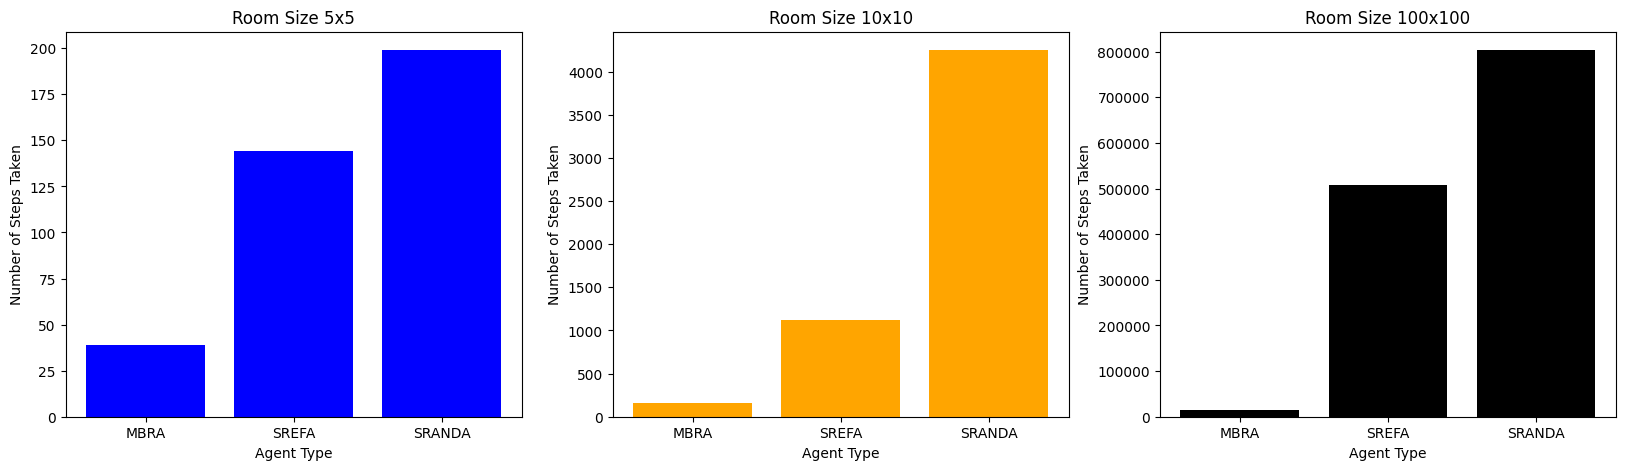

In [19]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

categories = ['MBRA','SREFA', 'SRANDA']
values5x5 = [39.0,144.4,199.0]
values10x10 = [158.0, 1116.0, 4252.0]
values100x100 = [15085.0,508015.2,803563.0]

plt.figure(figsize=(20,5))
# First chart (Bar chart)
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.bar(categories, values5x5, color='blue')
plt.title("Room Size 5x5")
plt.xlabel('Agent Type')
plt.ylabel('Number of Steps Taken')
# First chart (Bar chart)
plt.subplot(1, 3, 2)  # (rows, columns, index)
plt.bar(categories, values10x10, color='orange')
plt.title("Room Size 10x10")
plt.xlabel('Agent Type')
plt.ylabel('Number of Steps Taken')
# First chart (Bar chart)
plt.subplot(1, 3, 3)  # (rows, columns, index)
plt.bar(categories, values100x100, color='black')
plt.title("Room Size 100x100")
plt.xlabel('Agent Type')
plt.ylabel('Number of Steps Taken')


plt.show()

Key Note for the above Figure:
- MBRA = Model Based Reflex Agent
- SREFA = Simple Reflex Agent
- SRANDA = Simple Randomized Agent

Additionally you can see based on the runs average times that given any room size the Simple Randomized agent would take the longest to completely clean a room. However the Model Based Reflex Agent had the opposite effect performing better when comparing ratios for larger rooms.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

**ANSWER: Task 5 Robustness of the agent implementations**
* if it is put into a rectangular room with unknown size,
 * The randomized Agent would be able to clean the room completely without issues giving similar performances as previously tested
 * The Reflex Agent would be able to clean the room completely without issues giving similar performances as previously tested
 * The model based agent looks to find the upper left corner of the room and then takes a whirpool/snake approach that would be able to handle the following given approach.
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
 * The randomized Agent would be able to clean the room completely without issues however may perform worse for irrigular shapes as the randomness will come down to luck on a scenario like a hallway since the idea of being stuck in a room is an option.
 * The Reflex Agent would be able to clean the room completely without issues however may perform worse for irrigular shapes as the randomness will come down to luck on a scenario like a hallway since the idea of being stuck in a room is an option but may provide some better results without bumping into a wall.
 * If the cleaning area had an irregular shape, the algorithm implemented would not be able to handle this case for a narrow hallway for example since the robot would have captured the area and look for the outter most walls each time. Eventually have one room completed upon cleaned and the other left not fully clean.
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
 * The randomized Agent would be able to clean the room completely without issues giving similar performances as previously tested if not completing faster with obstacles taking up space.
 * The Reflex Agent would be able to clean the room completely without issues giving similar performances as previously tested if not completing faster with obstacles taking up space.
 * The model based algorithm would work for the environment in most cases however given a scenario where an obstacle is near a corner and creates a small hallway this will cause the agent to believe the room is completely clean which is false.
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
 * The randomized Agent would be able to clean the room completely without issues but with more steps to complete cleaning the room.
 * The Reflex Agent would be able to clean the room completely without issues but with more steps to complete cleaning the room.
 * The model based algorithm would crumble in this setting as the model base keeps track of the sensors current state and if wrong would pass a dirty spot without going back to check or know if it truly was dirty.
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.
 * The randomized Agent has the potential to bump into a wall with a 50% chance in a corner and be stuck for an excessive amount of steps making the cleaner underperform dramatically with the idea of the agent dying without even moving.
 * The Reflex Agent similar to the randomized agent has the potential to bump into a wall with a 50% chance in a corner and be stuck for an excessive amount of steps making the cleaner underperform dramatically with the idea of the agent dying without even moving.
 * The model based algorithm could possible end up in an endless loop without even finding a starting position considering a wall is never detected with only a 10% chance. Nonetheless a starting position is found there would be more complications when going on the outter walls similarly ending up to overtime spent running into walls and the agent dying on the job.

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [20]:
# The code that will be updated in the simulation environment  is as follows

# Keeping track of the squares cleaned for performance outcome
#   squares_cleaned = 0

# Keeping track of the original dirty tiles for performance outcome
#   orig_dirty = np.count_nonzero(environment == "Dirty")

# Implements the dirt sensor for a 10% chance of reading the current position
# incorrectly in this sense Clean
# if environment[agent_position]==state[0]:check = state[1]
#   else: check = state[0]
#   dirty = rng.choice([environment[agent_position],check], p = [.9, .1])

# Keep track of the squares that are correctly cleaned and update the environment
# accordingly
#   if (action == "suck"):
#      if environment[agent_position] != 'Clean':
#        squares_cleaned = squares_cleaned + 1
#      environment[agent_position] = 'Clean'

# Additionally the return statement will be updated to provide more performance metrics
#   return [step,squares_cleaned,orig_dirty]


import numpy as np
import collections


def environment(agent_function, room_size, verbose = True):
## Initialising the invironment by storing state of each square at random to be clean or dirty
  rng = np.random.default_rng()
  environment = rng.choice(["Dirty","Clean"],size = (room_size,room_size))
# The next line can be uncommented to see the environments states for each tile before cleaning
# print(environment)

  squares_cleaned = 0

## Initialize a random position on the floor for the agent to then keep track of
  agent_position = (np.random.randint(0,room_size), np.random.randint(0,room_size))

  state = ["Dirty","Clean"]
## Initializing direction based coordinates to be implemented when moving

  directions = {
        "north": (-1,0),
        "south": (1,0),
        "east": (0,1),
        "west": (0,-1)
   }
## Initializing bumpers to keep track of walls in this case will be out of bounds of an array
  bumpers = {}
## Initializing to keep track of the number of dirty spots to be cleaned
  num_cleaned = 0
## Keeping track of the number of Dirty spots are on the floor
  counter= np.count_nonzero(environment == "Dirty")

  orig_dirty = np.count_nonzero(environment == "Dirty")
## Initializing the first Step
  step = 0

## Creating a loop to have the robot continue to clean until all dirty spots are cleaned
  while 0 < counter:
## Need to keep track of the bumpers by doing so looping through each direction to check if there are walls sensed
## from the agents position. If a wall is sensed in this case an IndexError will populate and set the bumper direction
## to True
   for dir, (x,y) in directions.items():
     try:
       pos = agent_position[0] + x, agent_position[1] + y
       if pos[0] < 0 or pos[1]<0 or pos[0]>=environment.shape[0] or pos[1]>=environment.shape[1]:
         raise IndexError
       else:
         bumpers[dir] = False
     except IndexError:
        bumpers[dir] = True
## Need to check current agents positions state whether clean or dirty
   check = ""
   if environment[agent_position]==state[0]:check = state[1]
   else: check = state[0]
   dirty = rng.choice([environment[agent_position],check], p = [.9, .1])

## Call the agents function by providing the sensors inputs and whether the current position is clean or dirty
## to gather an action for next steps to do when navigating the floor

   action = agent_function(bumpers, dirty)

## Check actions gathered from the agents function to then update the agents new position
   if action == "NA": break
   if action == "north" and bumpers[action] != True: agent_position = agent_position[0] - 1 , agent_position[1]
   if action == "south" and bumpers[action] != True: agent_position = agent_position[0] + 1 , agent_position[1]
   if action == "east" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] + 1
   if action == "west" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] - 1

## Need to make sure if the action is set to suck that the environments state is updated to Clean
   if (action == "suck"):
      if environment[agent_position] != 'Clean':
        squares_cleaned = squares_cleaned + 1
      environment[agent_position] = 'Clean'

## Iterating the steps
   step = step + 1
## Checking dirty tiles and updating new counter
   counter = np.count_nonzero(environment == "Dirty")
#   The next line can be uncommented to see step by step the agents position
#   if (verbose): print("step", step , "- action:", action," Agent Position: ", agent_position)

# The next line can be uncommented to see the environments states for each tile after cleaning
#  print(environment)

## returning the steps taken to completely clean all dirty squares
  return [step,squares_cleaned,orig_dirty]


In [21]:
# Each agent will now be ran to show the performance for a dirty sensor
# implemented showing the amount of steps and actual tiles cleaned along side
# the efficiency for steps cleaned versus the squares cleaned.

agent = Agent()
mba = environment(model_based_agent,5)
sra = environment(simple_reflex_agent,5)
sranda = environment(simple_randomized_agent,5)

print(f"Model base reflex agent took {mba[0]} steps to clean a 5x5.\n The agent was able to clean {round(mba[1]/mba[2]*100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(mba[1]/mba[0]*100,2)}%")
print(f"\nSimple reflex agent took {sra[0]} steps to clean a 5x5.\n The agent was able to clean {round(sra[1]/sra[2] * 100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(sra[1]/sra[0]*100,2)}%")
print(f"\nSimple randomized agent took {sranda[0]} steps to clean a 5x5.\n The agent was able to clean {round(sranda[1]/sranda[2] * 100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(sranda[1]/sranda[0]*100,2)}%")

Model base reflex agent took 41 steps to clean a 5x5.
 The agent was able to clean 78.57% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 26.83%

Simple reflex agent took 266 steps to clean a 5x5.
 The agent was able to clean 100.0% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 4.51%

Simple randomized agent took 637 steps to clean a 5x5.
 The agent was able to clean 100.0% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 2.2%


In [22]:
# Now we'll look to try to increase the performance of the Model base reflex
# agent given it was unable to clean the entire room and will implement more iterations
# for the agent to rerun through the cycle to recheck all tiles
agent_no_reset = Agent()

def model_based_agent_no_reset(bumpers, dirty):
  action = agent_no_reset.act(bumpers,dirty)
  return action

agent_reset_1 = Agent()
agent_reset_1_V1 = Agent()

def model_based_agent_1_reset(bumpers, dirty):
  action = agent_reset_1.act(bumpers,dirty)
  if action == "NA":
    action = agent_reset_1_V1.act(bumpers,dirty)
  return action


In [23]:
# now we'll check the performance against the model that goes through the tiles a second time
mba = environment(model_based_agent_no_reset,5)
print(f"Model base reflex agent with no resets took {mba[0]} steps to clean a 5x5.\n The agent was able to clean {round(mba[1]/mba[2]*100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(mba[1]/mba[0]*100,2)}%\n")

mba_1 = environment(model_based_agent_1_reset,5)
print(f"Model base reflex agent with 1 resets took {mba_1[0]} steps to clean a 5x5.\n The agent was able to clean {round(mba_1[1]/mba_1[2]*100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(mba_1[1]/mba_1[0]*100,2)}%\n")






Model base reflex agent with no resets took 36 steps to clean a 5x5.
 The agent was able to clean 75.0% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 25.0%

Model base reflex agent with 1 resets took 61 steps to clean a 5x5.
 The agent was able to clean 100.0% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 24.59%



Given the above results there is a trade off in ensuring the room is completely cleaned when comparing the efficiency of maximizing the performance by revisiting each square in the room. This will increase the amount of steps taken and but decrease the efficiency of cleaning the room versus less.